In [49]:
import serial

In [121]:
ser = serial.Serial("/dev/cu.usbserial-A603QGMH", baudrate=115200)
ser.reset_input_buffer()
x = ser.read(1)
ser.close()

In [122]:
x

b'>'

In [123]:
int.from_bytes(x, byteorder='little')

62

In [97]:
bytes([67])

b'C'

In [1]:
%config InlineBackend.figure_format='svg'
%matplotlib inline

In [2]:
from matplotlib.pyplot import figure, style, subplot
style.use("ggplot")

In [135]:
from serial import Serial
from time import time, sleep

In [4]:
from ipywidgets import widgets

In [134]:
xs = []
en = []
es = []
us = []
ts = []

referencia=100
ref = widgets.IntSlider(min=0, max=255, step=1, value=referencia)
def on_change(v):
    referencia = v['new']
ref.observe(on_change, names='value')
display(ref)

with Serial("/dev/cu.usbserial-A603QGMH", baudrate=115200) as puerto_arduino:
    for i in range(1000):
        #puerto_arduino.reset_input_buffer()
        xs.append(int.from_bytes(puerto_arduino.read(1), byteorder='little'))
        #ref.observe(on_change, names='value')
        en.append(ref.value)
        es.append(en[-1] - xs[-1])
        ts.append(time())
        if len(es)>1:
            us.append(max(min(255, 4*es[-1] + (es[-1]-es[-2])),-255))
        else:
            us.append(0)
        #print (xs[-1], es[-1], us[-1])
        if us[-1] > 0:
            puerto_arduino.write(bytes([0]))
            puerto_arduino.write(bytes([us[-1]]))
        else:
            puerto_arduino.write(bytes([1]))
            puerto_arduino.write(bytes([abs(us[-1])]))

IntSlider(value=100, max=255)

In [132]:
tiempos = []
for t in ts:
    tiempos.append(t - ts[0])

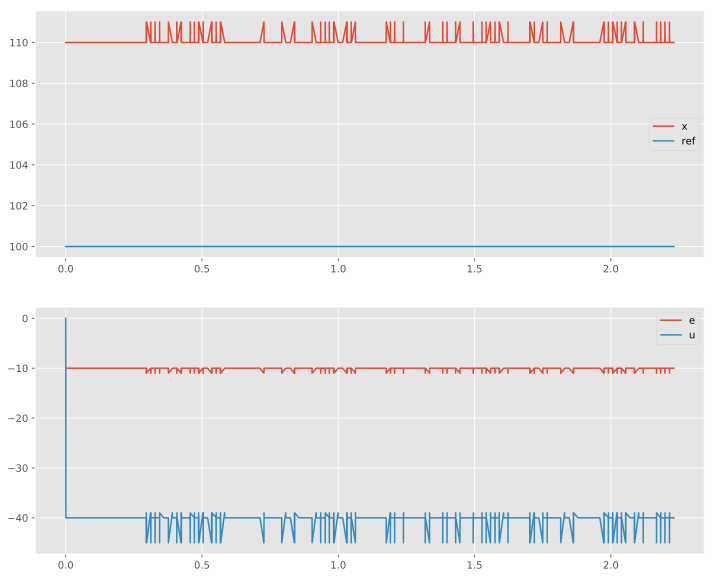

In [133]:
fig = figure(figsize=(12,10))
ax1 = subplot(211)
ax2 = subplot(212)
p1, = ax1.plot(tiempos, xs)
p2, = ax1.plot(tiempos, en)
p3, = ax2.plot(tiempos, es)
p4, = ax2.plot(tiempos, us)
ax1.legend([p1, p2],["x", "ref"])
ax2.legend([p3, p4],["e", "u"])

In [124]:
abs(-1)

1

In [125]:
δts = []
for i in range(len(tiempos)-1):
    δts.append(tiempos[i+1]-tiempos[i])

In [126]:
δts

[0.0002658367156982422,
 0.0001971721649169922,
 0.00021576881408691406,
 0.0002181529998779297,
 0.01503896713256836,
 0.000518798828125,
 0.00018930435180664062,
 0.00025391578674316406,
 0.0002849102020263672,
 0.00010800361633300781,
 0.00018310546875,
 0.014455080032348633,
 0.0002658367156982422,
 0.00023603439331054688,
 0.00021505355834960938,
 0.0001499652862548828,
 0.00010991096496582031,
 0.00012493133544921875,
 0.014938116073608398,
 0.0007240772247314453,
 0.00032401084899902344,
 0.0006940364837646484,
 0.0005159378051757812,
 0.0002968311309814453,
 0.0002541542053222656,
 0.01334524154663086,
 0.0007266998291015625,
 0.0005691051483154297,
 0.0005691051483154297,
 0.0008368492126464844,
 0.0003838539123535156,
 0.0002810955047607422,
 0.012677907943725586,
 0.0002942085266113281,
 0.0003490447998046875,
 0.00023889541625976562,
 0.00015592575073242188,
 0.0003788471221923828,
 0.0003693103790283203,
 0.014236927032470703,
 0.0004248619079589844,
 0.0005450248718261719

In [127]:
import statistics
statistics.stdev(δts)

0.005056284645129562

In [22]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [128]:
from functools import wraps
def pause(send, receive):
    def f(iterator):
        @wraps(iterator)
        def inner():
            i = iterator()
            def next_i(change):
                try:
                    send[0].set_trait(send[1], i.send(change.new))
                except StopIteration as e:
                    send[0].set_trait(send[1], e.value)
                    receive[0].unobserve(next_i, receive[1])
            receive[0].observe(next_i, receive[1])
            send[0].set_trait(send[1], next(i))
        return inner
    return f

In [129]:
from ipywidgets import IntSlider, VBox, HTML
a=HTML(description='set by function:')
b=IntSlider(description='send to function:')
VBox([a,b])

Received value 2
Received value 3
Received value 4
Received value 5
Received value 7
Received value 8
Received value 10
Received value 11
Received value 14
Received value 15
Received value 3
Received value 5
Received value 6
Received value 7
Received value 8
Received value 9
Received value 10
Received value 11
Received value 12
Received value 13


In [136]:
@pause((a,'value'), (b,'value'))
def f():
    for i in range(10):
        sleep(1)
        bvalue = yield 'Did work %s'%i
        print('Received value %s'%bvalue)
    return 'Done!'
f()